In [34]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from End2End.tasks.transcription.utils import (calculate_mean_std,
                                               calculate_intrumentwise_statistics,
                                               evaluate_F1,
                                               evaluate_flat_F1,
                                               piecewise_evaluation,
                                               get_flat_average,
#                                                barplot
                                              )
import torch

In [25]:
def barplot(stat_mean, title="Untitles", figsize=(4,24)):
#     stat_mean = collections.OrderedDict(sorted(stat_mean.items()))    
    stat_mean = {k: v for k, v in sorted(stat_mean.items(), key=lambda item: item[1])}
    fig, ax = plt.subplots(1,1, figsize=figsize)
    xlabels = list(stat_mean.keys())
    values = list(stat_mean.values())
    ax.barh(xlabels, values)
    global_mean = sum(stat_mean.values())/len(stat_mean.values())
    ax.vlines(global_mean, 0, len(stat_mean), 'r')    
    ax.tick_params(labeltop=True, labelright=False)
#     ax.xaxis.grid(True, which='minor')
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.set_ylim([-1,len(xlabels)])
    ax.set_xlim([0,1])
    ax.set_title(title)
#     text_kwargs = dict(fontsize=12, color='C1', transform=ax.transAxes)
#     ax.text(0, 1.03, f'mean={global_mean}', **text_kwargs)
    ax.grid(axis='x')
    ax.grid(b=True, which='minor', linestyle='--')    
    fig.savefig(f'{title}.png', bbox_inches='tight', dpi=200)
#     ax.invert_yaxis()  # labels read top-to-bottom

    return global_mean, fig

In [4]:
notewise_dict = pickle.load(open('./outputs/2022-05-20/09-54-19/notewise_dict.pkl', 'rb'))

In [5]:
instrument_wise_precision, instrument_wise_recall, instrument_wise_F1 = calculate_intrumentwise_statistics(notewise_dict, 'note')
instrument_wise_precision_woff, instrument_wise_recall_woff, instrument_wise_F1_woff = calculate_intrumentwise_statistics(notewise_dict, 'note_w_off')

In [27]:
F1_mean, F1_std = calculate_mean_std(instrument_wise_F1)
F1_mean_woff, F1_std_woff = calculate_mean_std(instrument_wise_F1_woff)

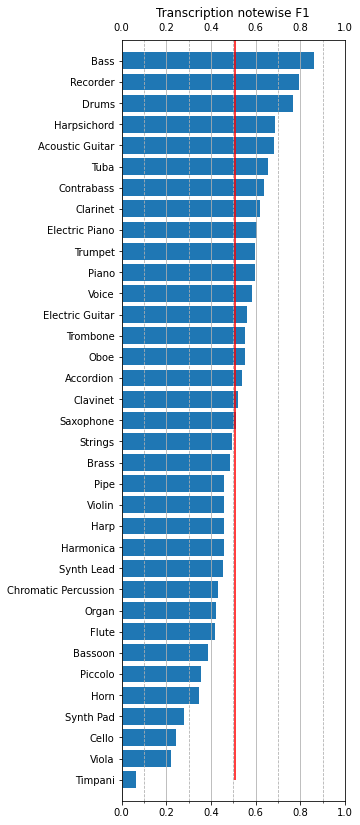

In [29]:
global_mean, fig_notef1 = barplot(F1_mean, 'Transcription notewise F1', figsize=(4,14))

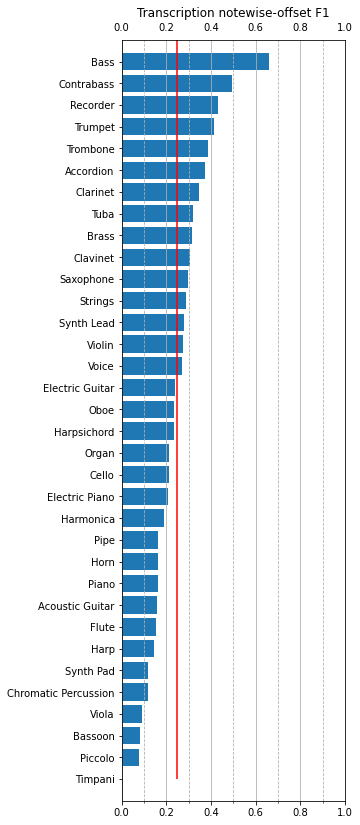

In [30]:
global_mean_woff, fig_noteoffsetf1 = barplot(F1_mean_woff, 'Transcription notewise-offset F1', figsize=(4,14))

# SDR

In [46]:
def sdr_barplot(stat_mean, title="Untitles", figsize=(4,24)):
#     stat_mean = collections.OrderedDict(sorted(stat_mean.items()))    
    stat_mean = {k: v for k, v in sorted(stat_mean.items(), key=lambda item: item[1])}
    fig, ax = plt.subplots(1,1, figsize=figsize)
    xlabels = list(stat_mean.keys())
    values = list(stat_mean.values())
    ax.barh(xlabels, values, color='cyan')
    global_mean = sum(stat_mean.values())/len(stat_mean.values())
    ax.vlines(global_mean, 0, len(stat_mean), 'r')    
    ax.tick_params(labeltop=True, labelright=False)
    ax.set_ylim([-1,len(xlabels)])
    ax.set_title(title)
    ax.grid(axis='x')
    ax.grid(b=True, which='minor', linestyle='--')    
    
    # move the left boundary to origin
    ax.spines['left'].set_position('zero')
    # turn off the RHS boundary
    ax.spines['right'].set_color('none')
    
    fig.savefig(f'{title}.png', bbox_inches='tight', dpi=200)

    return global_mean, fig        

In [40]:
instrumentwise_sdr = torch.load('outputs/2022-05-20/09-48-14/instrumentwise_sdr.pt')

(1.8453279464881405, <Figure size 288x1296 with 1 Axes>)

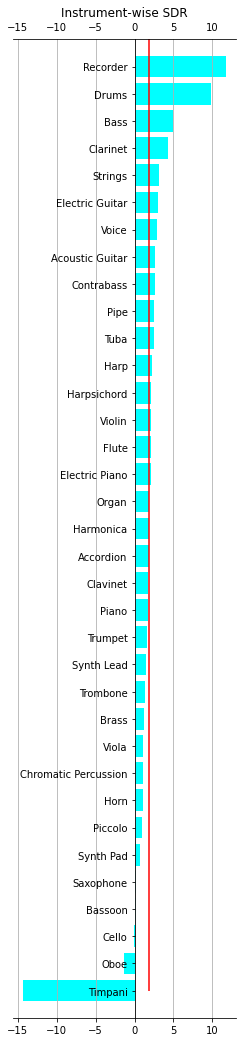

In [47]:
sdr_barplot(instrumentwise_sdr, title="Instrument-wise SDR", figsize=(4,18))

In [48]:
def calculate_sdr(ref, est):
    assert ref.dim()==est.dim(), f"ref {ref.shape} has a different size than est {est.shape}"
    
    s_true = ref
    s_artif = est - ref

    sdr = 10. * (
        torch.log10(torch.clip(torch.mean(s_true ** 2, 1), 1e-8, torch.inf)) \
        - torch.log10(torch.clip(torch.mean(s_artif ** 2, 1), 1e-8, torch.inf)))
    return sdr

In [49]:
x = torch.randn(4,1000)

In [51]:
calculate_sdr(x,x)

tensor([80.1590, 80.3152, 80.1880, 79.6032])